### <span style="color:GoldenRod ">**User Engagement Analysis**</span>

### **Problem Statement**

In the highly competitive restaurant industry, understanding the key drivers of business success is essential for stakeholders. This project leverages the Yelp dataset to examine the relationship between user engagement (e.g., reviews, tips, and check-ins) and business performance metrics, such as review count and average ratings, specifically for restaurants.

### **Research Objectives**

1. **Assess the correlation between user engagement and business performance:** Investigate how factors such as reviews, tips, and check-ins influence review counts and average star ratings, identifying whether higher user engagement drives better business outcomes.

2. **Examine the impact of sentiment analysis on ratings and review counts:** Determine whether positive sentiments in user-generated content (reviews and tips) lead to higher star ratings and an increase in the number of reviews received.

3. **Analyze time-based trends in user engagement:** Explore whether sustained user engagement over time has a greater impact on long-term business success compared to occasional bursts of activity.

### **Hypothesis Testing**

- **Correlation Between Engagement and Performance:** Higher levels of user engagement (e.g., increased reviews, tips, and check-ins) are positively associated with higher review counts and star ratings.
- **Sentiment Influence:** Positive sentiment in user reviews and tips significantly contributes to improved ratings and greater review counts.
- **Consistency in Engagement:** Restaurants that maintain consistent user engagement over time experience more sustained success compared to those with sporadic engagement patterns.

### **Importing Librarires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sqlalchemy
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### **Database Connection**

In [2]:
# Create database connection (The connection should be from the same folder as the database)
conn = sqlite3.connect('yelp_optimized.db')

In [3]:
tables = pd.read_sql_query ("SELECT name from sqlite_master where type = 'table'", conn)

In [4]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [5]:
# Explore the type of data available in the tables
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5;", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


### **Data Analysis**

In [6]:
#Count the number of businesses
pd.read_sql_query("select count(*) from business;", conn)

,count(*)
0,150346


In [7]:
# Select all the restaurant businesses that are open
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open=1;""", conn)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


#### What is the descriptive stats for review count and stars rating for businesses? (Business score)

In [8]:
# For descriptive stats first we need to check the distribution for any outliers 
# Distribution requires avg, min, max, median

pd.read_sql_query(f"""SELECT
    AVG(review_count) AS avg_review_count,
    MIN(review_count) AS min_review_count,
    MAX(review_count) AS max_review_count,
    (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) /2) AS median_review_count,
                  
    AVG(stars) AS avg_stars_rating,
    MIN(stars) AS min_stars_rating,
    MAX(stars) AS max_star_rating,
    (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) /2) AS median_star_rating
                  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])}

""", conn).transpose()


,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_stars_rating,3.523969
min_stars_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


#### Here the maximum review count is 7568 while the median is 15, let's define a funstion to remove the outliers

In [9]:
# Define a function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
# Removing the outliers
business_id = remove_outliers(business_id, 'review_count')

In [11]:
# data frame without outliers in review count
business_id.shape

(31537, 2)

In [12]:
pd.read_sql_query(f"""SELECT
    AVG(review_count) AS avg_review_count,
    MIN(review_count) AS min_review_count,
    MAX(review_count) AS max_review_count,
    (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) /2) AS median_review_count,
                  
    AVG(stars) AS avg_stars_rating,
    MIN(stars) AS min_stars_rating,
    MAX(stars) AS max_star_rating,
    (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) /2) AS median_star_rating
                  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])}

""", conn).transpose()

,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_stars_rating,3.477281
min_stars_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


#### After removing the outliers the maximum review count is 248

#### Let's check which restaurants have the higest number of reviews

In [13]:
pd.read_sql_query(f"""SELECT name, SUM(review_count) AS review_counts, AVG(stars) AS avg_ratings
                  FROM business 
                  WHERE business_id in {tuple(business_id['business_id'])} 
                  GROUP BY name 
                  ORDER BY review_counts DESC limit 10 """, conn)

,name,review_counts,avg_ratings
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


#### Let's check which restaurants have the higest rating

In [14]:
pd.read_sql_query(f""" SELECT name, SUM(review_count) AS review_counts, AVG(stars) AS avg_ratings
                  FROM business
                  WHERE business_id in {tuple(business_id['business_id'])}
                  GROUP BY name
                  ORDER BY avg_ratings DESC limit 10
""", conn)

,name,review_counts,avg_ratings
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


#### Here we see that companies with highest number of review_counts does not mean that they have higher ratings and companies with higher ratings do not have good number of reviews


#### Let's check if restaurants with higher engagement tend to have higher ratings?

In [15]:
# Calculate Checkin count
pd.read_sql_query(f"""WITH CheckinCount AS (
                  SELECT business_id,
                  SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', ''))+1)
                  AS checkin_count
                  FROM checkin
                  GROUP BY business_id 
                  )
                  SELECT business_id, checkin_count
                  FROM CheckinCount
                  """, conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [16]:
# Calculate tip Count
pd.read_sql_query(f""" SELECT business_id, COUNT(*) AS tip_count
                  FROM tip
                  GROUP BY business_id
                  """, conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [17]:
review_count_df = pd.read_sql_query(f""" SELECT total.avg_rating as rating,
                  AVG(total.review_count) AS avg_review_count,
                  AVG(total.checkin_count) AS avg_checkin_count,
                  AVG(total.tip_count) AS avg_tip_count 
                  FROM 
                  (SELECT 
                  b.business_id, 
                  SUM(b.review_count) AS review_count,
                  AVG(b.stars) AS avg_rating,
                  SUM(LENGTH(c.date) - LENGTH(REPLACE(c.date,',',''))+1) AS checkin_count,
                  SUM(tip.tip_count) AS tip_count
                  FROM business b
                  LEFT JOIN checkin c
                  ON b.business_id = c.business_id
                  LEFT JOIN
                  (SELECT business_id, count(business_id) AS tip_count
                  FROM tip GROUP BY business_id ORDER BY tip_count) as tip
                  ON b.business_id = tip.business_id
                  WHERE b.business_id IN {tuple(business_id['business_id'])}
                  GROUP BY 
                  b.business_id) AS total
                  GROUP BY total.avg_rating
""", conn)

In [18]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


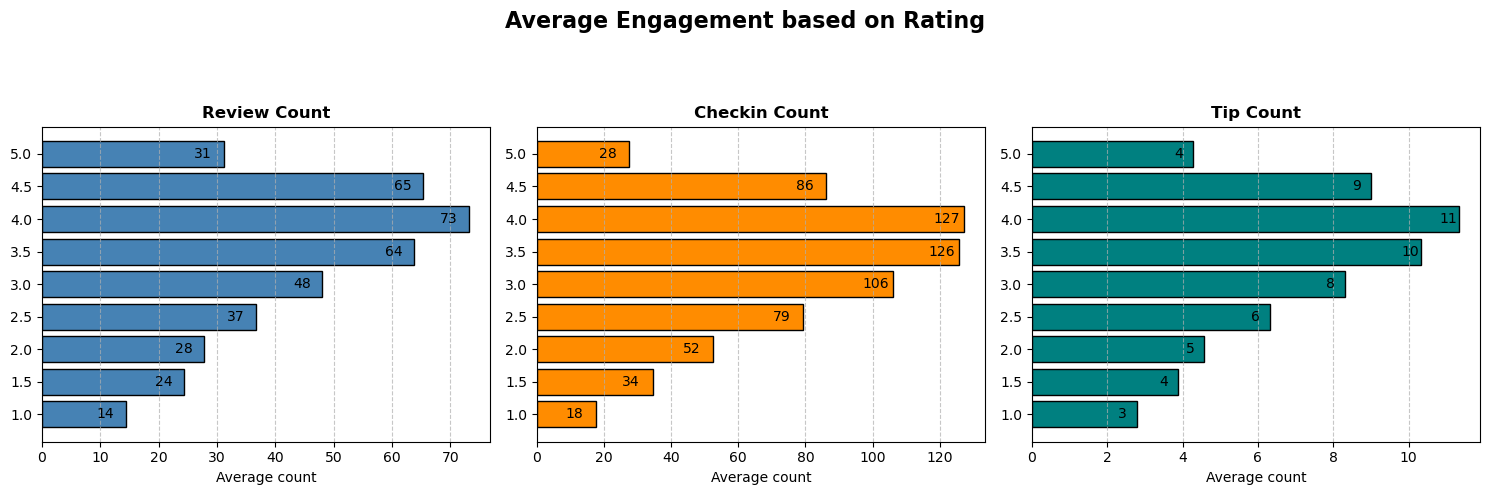

In [19]:
plt.figure(figsize=(15, 5))
plt.suptitle('Average Engagement based on Rating\n\n', fontsize=16, fontweight='bold')
plt.subplot(1,3,1)
plt.title('Review Count', fontsize=12, fontweight='bold')
plt.barh(review_count_df['rating'].astype('str'),                           # Ratings as strings for the y-axis
         review_count_df['avg_review_count'],                               # Average review counts for the bar lengths
         edgecolor='k', color='#4682B4')                                       # Black edges around the bars, Bars filled with teal color
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value-5, i, str(round(value)), color='black', va='center')
plt.xlabel('Average count')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplot(1,3,2)
plt.title('Checkin Count', fontsize=12, fontweight='bold')
plt.barh(
    review_count_df['rating'].astype('str'),
    review_count_df['avg_checkin_count'],
    edgecolor='k', color='#FF8C00')
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value-9, i, str(round(value)), color='black', va='center')
plt.xlabel('Average count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
  


plt.subplot(1,3,3)
plt.title('Tip Count', fontsize=12, fontweight='bold')
plt.barh(
    review_count_df['rating'].astype('str'),
    review_count_df['avg_tip_count'],
    edgecolor='k', color='#008080')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value-0.5, i, str(round(value)), color='black', va='center')
plt.xlabel('Average count')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Here we obeserve that a 4 star rating or above can be considered as the optimal rating for any resaturant to be successfull.

#### Let's check if there is a correlation between the number of reviews, tips, and check-ins for a business

In [20]:
engagement_df = pd.read_sql_query(f"""SELECT 
                  b.business_id, 
                  SUM(b.review_count) AS review_count,
                  AVG(b.stars) AS avg_rating,
                  SUM(LENGTH(c.date) - LENGTH(REPLACE(c.date,',',''))+1) AS checkin_count,
                  SUM(tip.tip_count) AS tip_count
                  FROM business b
                  LEFT JOIN checkin c
                  ON b.business_id = c.business_id
                  LEFT JOIN
                  (SELECT business_id, count(business_id) AS tip_count
                  FROM tip GROUP BY business_id ORDER BY tip_count) as tip
                  ON b.business_id = tip.business_id
                  WHERE b.business_id IN {tuple(business_id['business_id'])}
                  GROUP BY 
                  b.business_id
""", conn).dropna()
engagement_df


,business_id,review_count,avg_rating,checkin_count,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0
...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0


In [21]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

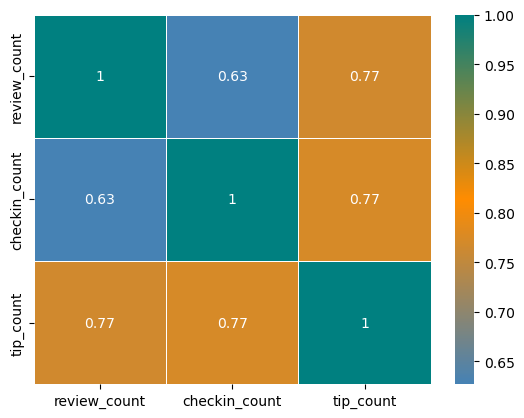

In [22]:
colors = ["#4682B4", "#FF8C00", "#008080"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='white')

#### Let's check if there is a difference in the user engagement (reviews, tips, and check-ins) between high_rated and low_rated businesses

In [23]:
engagement_df = pd.read_sql_query(f"""SELECT 
                  b.business_id, 
                  SUM(b.review_count) AS review_count,
                  AVG(b.stars) AS avg_rating,
                  SUM(LENGTH(c.date) - LENGTH(REPLACE(c.date,',',''))+1) AS checkin_count,
                  SUM(tip.tip_count) AS tip_count,
                  (CASE WHEN b.stars >= 3.5 THEN 'High_Rated' ELSE 'Low_Rated' END) AS category
                  FROM business b
                  LEFT JOIN checkin c
                  ON b.business_id = c.business_id
                  LEFT JOIN
                  (SELECT business_id, count(business_id) AS tip_count
                  FROM tip GROUP BY business_id ORDER BY tip_count) as tip
                  ON b.business_id = tip.business_id
                  WHERE b.business_id IN {tuple(business_id['business_id'])}
                  GROUP BY 
                  b.business_id
""", conn).dropna()
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,High_Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,Low_Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,Low_Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,Low_Rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,Low_Rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,Low_Rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,Low_Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,High_Rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,High_Rated


In [24]:
engagement_df.groupby('category')[['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High_Rated,72.291062,10.162766,122.066641
Low_Rated,42.123420,6.541689,88.880828


#### Here we observe that High Rated restaurants have more engagement as compared to Low Rated restaurants

#### Let's analyse, starting a restaurant business in which city or state will have a higher chanece of scuccess rate

In [25]:
# Function to calculate the success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score=[]
    for i, row in df.iterrows():
        score=row['avg_rating'] * np.log(row['review_count'] + 1)           # assigning the weights here
        success_score.append(score)
    return success_score

In [26]:
# How do the success metric (review_count or avg_rating) of restaurants vary accorss different states and cities?
city_df = pd.read_sql_query(f"""SELECT city, state, longitude, latitude,
                  AVG(stars) AS avg_rating,
                  SUM(review_count) AS review_count,
                  COUNT(*) AS restaurant_count
                  FROM business
                  WHERE business_id IN{tuple(business_id['business_id'])}
                  GROUP BY state, city
                  ORDER BY review_count desc LIMIT 10
""", conn)

city_df

,city,state,longitude,latitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,-75.155564,39.955505,3.532156,175487,3001
1,Tampa,FL,-82.502346,27.890814,3.571429,104376,1715
2,Indianapolis,IN,-86.127217,39.637133,3.412111,92639,1701
3,Tucson,AZ,-111.010760,32.338572,3.386187,91613,1419
4,Nashville,TN,-86.768170,36.208102,3.493590,87070,1404
5,New Orleans,LA,-90.042604,29.963974,3.693676,69239,1012
6,Saint Louis,MO,-90.407187,38.583223,3.414303,51490,811
7,Reno,NV,-119.784037,39.476518,3.479626,48393,589
8,Edmonton,AB,-113.604288,53.436403,3.509379,45916,1546
9,Boise,ID,-116.206275,43.611192,3.558824,36104,561


In [27]:
city_df['success_score'] = calculate_success_metric(city_df)
city_df

,city,state,longitude,latitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,-75.155564,39.955505,3.532156,175487,3001,42.651934
1,Tampa,FL,-82.502346,27.890814,3.571429,104376,1715,41.270588
2,Indianapolis,IN,-86.127217,39.637133,3.412111,92639,1701,39.022521
3,Tucson,AZ,-111.010760,32.338572,3.386187,91613,1419,38.688341
4,Nashville,TN,-86.768170,36.208102,3.493590,87070,1404,39.737764
5,New Orleans,LA,-90.042604,29.963974,3.693676,69239,1012,41.167252
6,Saint Louis,MO,-90.407187,38.583223,3.414303,51490,811,37.042331
7,Reno,NV,-119.784037,39.476518,3.479626,48393,589,37.535187
8,Edmonton,AB,-113.604288,53.436403,3.509379,45916,1546,37.671748
9,Boise,ID,-116.206275,43.611192,3.558824,36104,561,37.346958


In [28]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max()
                                    )

# Add markers to the map
for i, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)

### **Time Series Analysis**

#### Are there any patterns in user engagement over time for successful business compared to less successful ones?
#### Are there any seasonal trends in the user engagement for restaurants?

In [29]:
high_rated_engagement = pd.read_sql_query(f""" SELECT review.month_year, review.review_count, tip.tip_count
                                          FROM 
                                          (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
                                          FROM review
                                          WHERE business_id IN {tuple(business_id['business_id'])} AND stars >= 3.5
                                          GROUP BY month_year
                                          ORDER BY month_year) AS review
                                          INNER JOIN
                                          (SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
                                          FROM tip
                                          INNER JOIN 
                                          business AS b
                                          ON tip.business_id = b.business_id
                                          WHERE tip.business_id IN {tuple(business_id['business_id'])} AND stars >= 3.5
                                          GROUP BY month_year
                                          ORDER BY month_year) as tip
                                          
                                          ON review.month_year = tip.month_year;
""", conn)



In [30]:
low_rated_engagement = pd.read_sql_query(f""" SELECT review.month_year, review.review_count, tip.tip_count
                                         FROM 
                                         (SELECT strftime('%m-%Y', date) as month_year, COUNT(*) AS review_count
                                         FROM review
                                         WHERE business_id IN {tuple(business_id['business_id'])} AND stars < 3.5
                                         GROUP BY month_year
                                         ORDER BY month_year) AS review
                                         INNER JOIN 
                                         (SELECT  AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count 
                                         FROM tip
                                         INNER JOIN
                                         business AS b
                                         ON tip.business_id = b.business_id
                                         WHERE tip.business_id IN {tuple(business_id['business_id'])} AND stars < 3.5
                                         GROUP BY month_year
                                         ORDER BY month_year) AS tip

                                         ON review.month_year = tip.month_year;
""", conn)

In [31]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [32]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [33]:
# Getting only the month year and avg rating for our analysis

time_rating = pd.read_sql_query(f""" SELECT strftime('%m-%Y', date) as month_year, AVG(stars) as avg_rating
                                FROM review
                                WHERE business_id IN {tuple(business_id['business_id'])}
                                GROUP BY month_year
                                ORDER BY month_year;
""", conn)

In [34]:
time_rating         # gives the avg rating of the business for every month

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [35]:
# Month year is in str format, we will convert it to date time and filter out data only for past 5 year for our time series analysis

time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year'] > '2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']

In [36]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

In [37]:
high_rated_engagement.head()

,month_year,review_count,tip_count,avg_rating
20,2017-02-01,9607,1677,3.636779
32,2017-03-01,10852,2101,3.641116
45,2017-04-01,10734,2124,3.631225
58,2017-05-01,11590,2019,3.632701
71,2017-06-01,11723,2015,3.676874


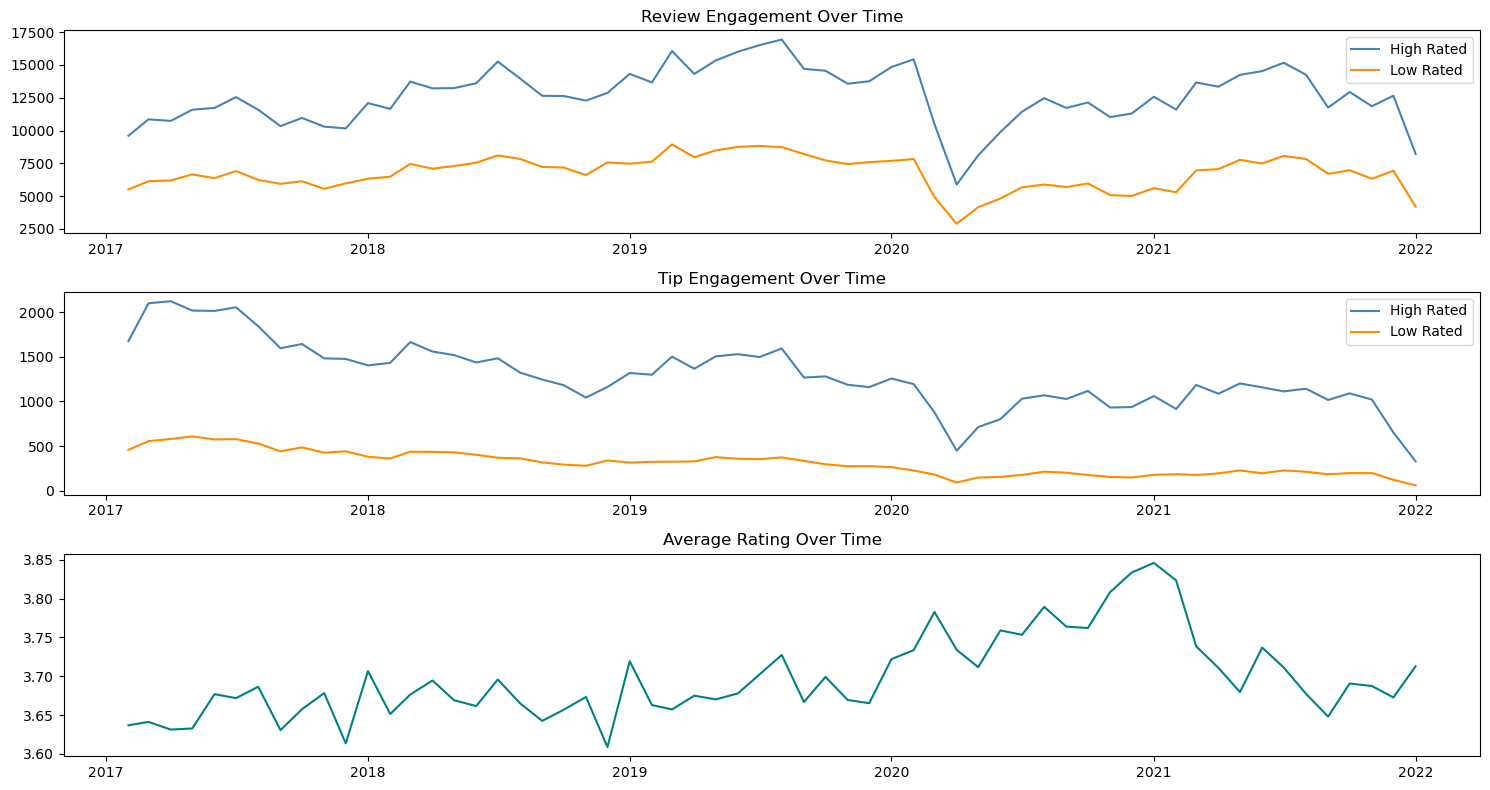

In [38]:
# Let's plot a line plot to see time series trend between high rated engagement and low rated engagement

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#4682B4')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated', color='#FF8C00')
plt.title('Review Engagement Over Time')
plt.legend()

plt.subplot(3,1,2)
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High Rated', color='#4682B4')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low Rated', color='#FF8C00')
plt.title('Tip Engagement Over Time')
plt.legend()

plt.subplot(3,1,3)
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#008080')
plt.title('Average Rating Over Time')
plt.tight_layout()
plt.show()

In [39]:
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')
# Here the index should always be a time(day, month or year) in time series analysis and values should be in a series

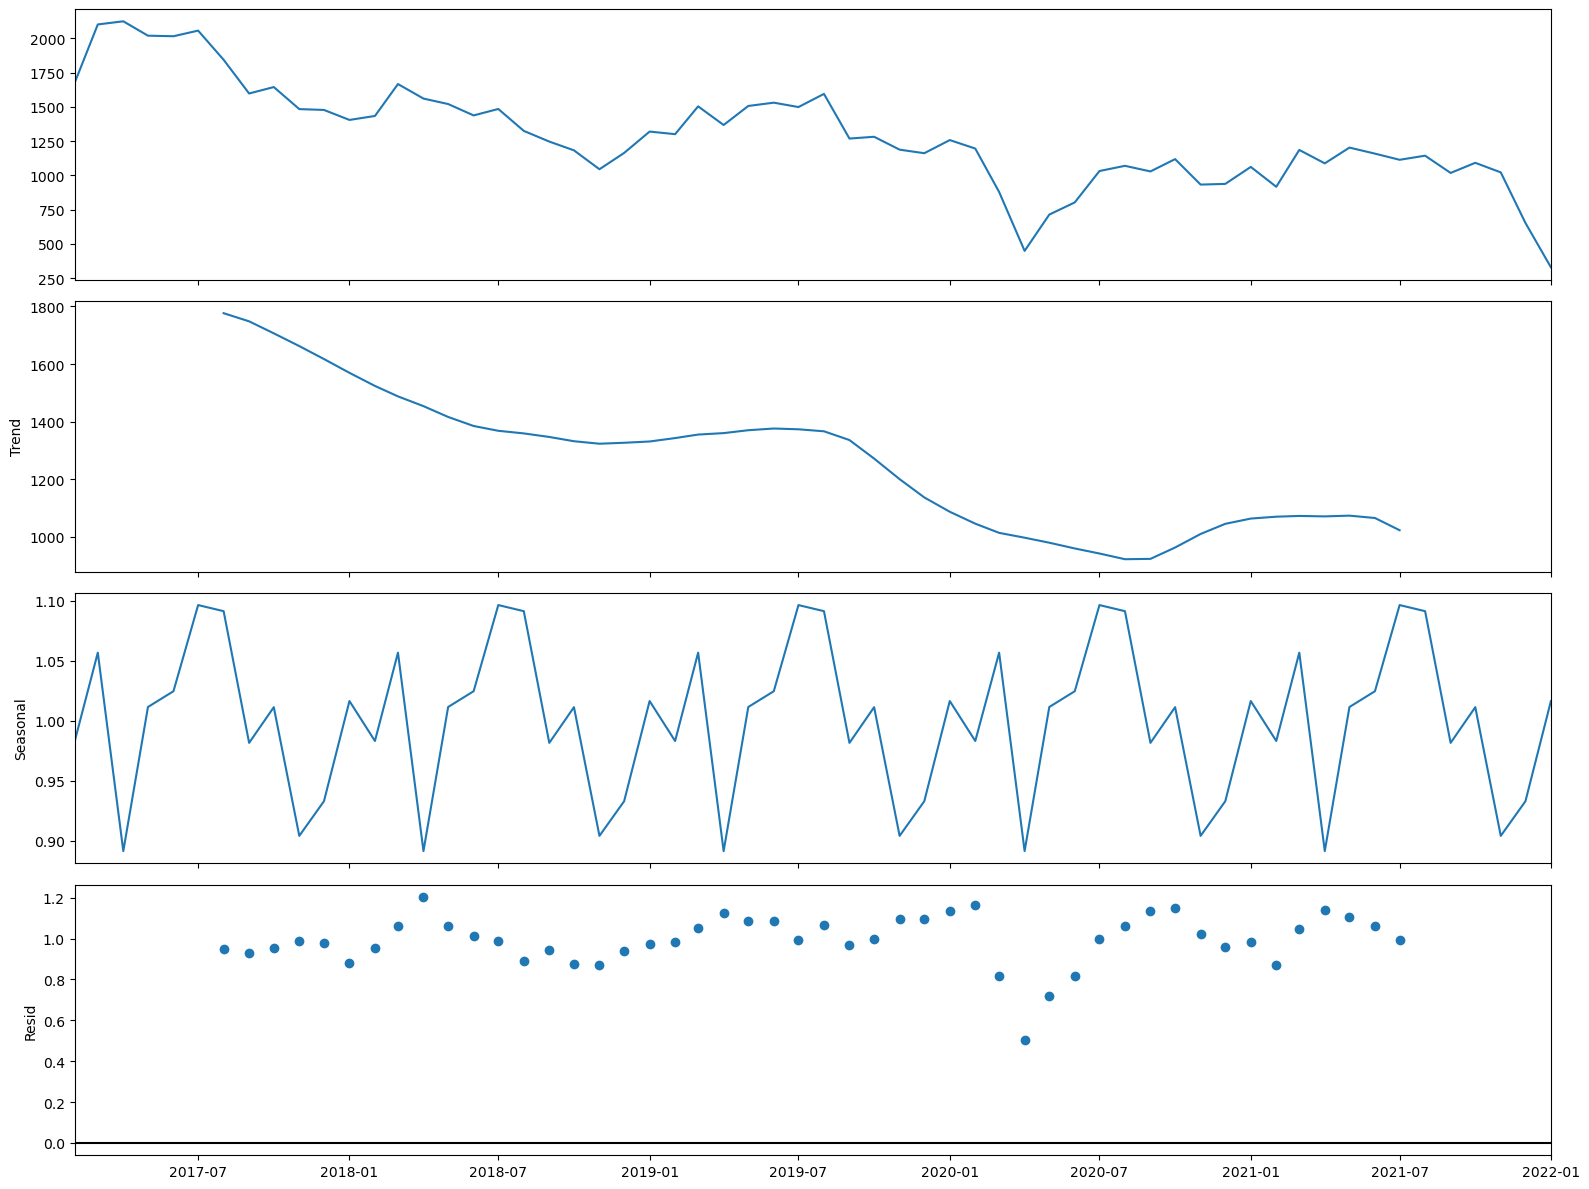

In [40]:
# Checking seasonal decomposition for tip high rated
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize':(16, 12)})
multiplicative_decomposition.plot()
plt.show()

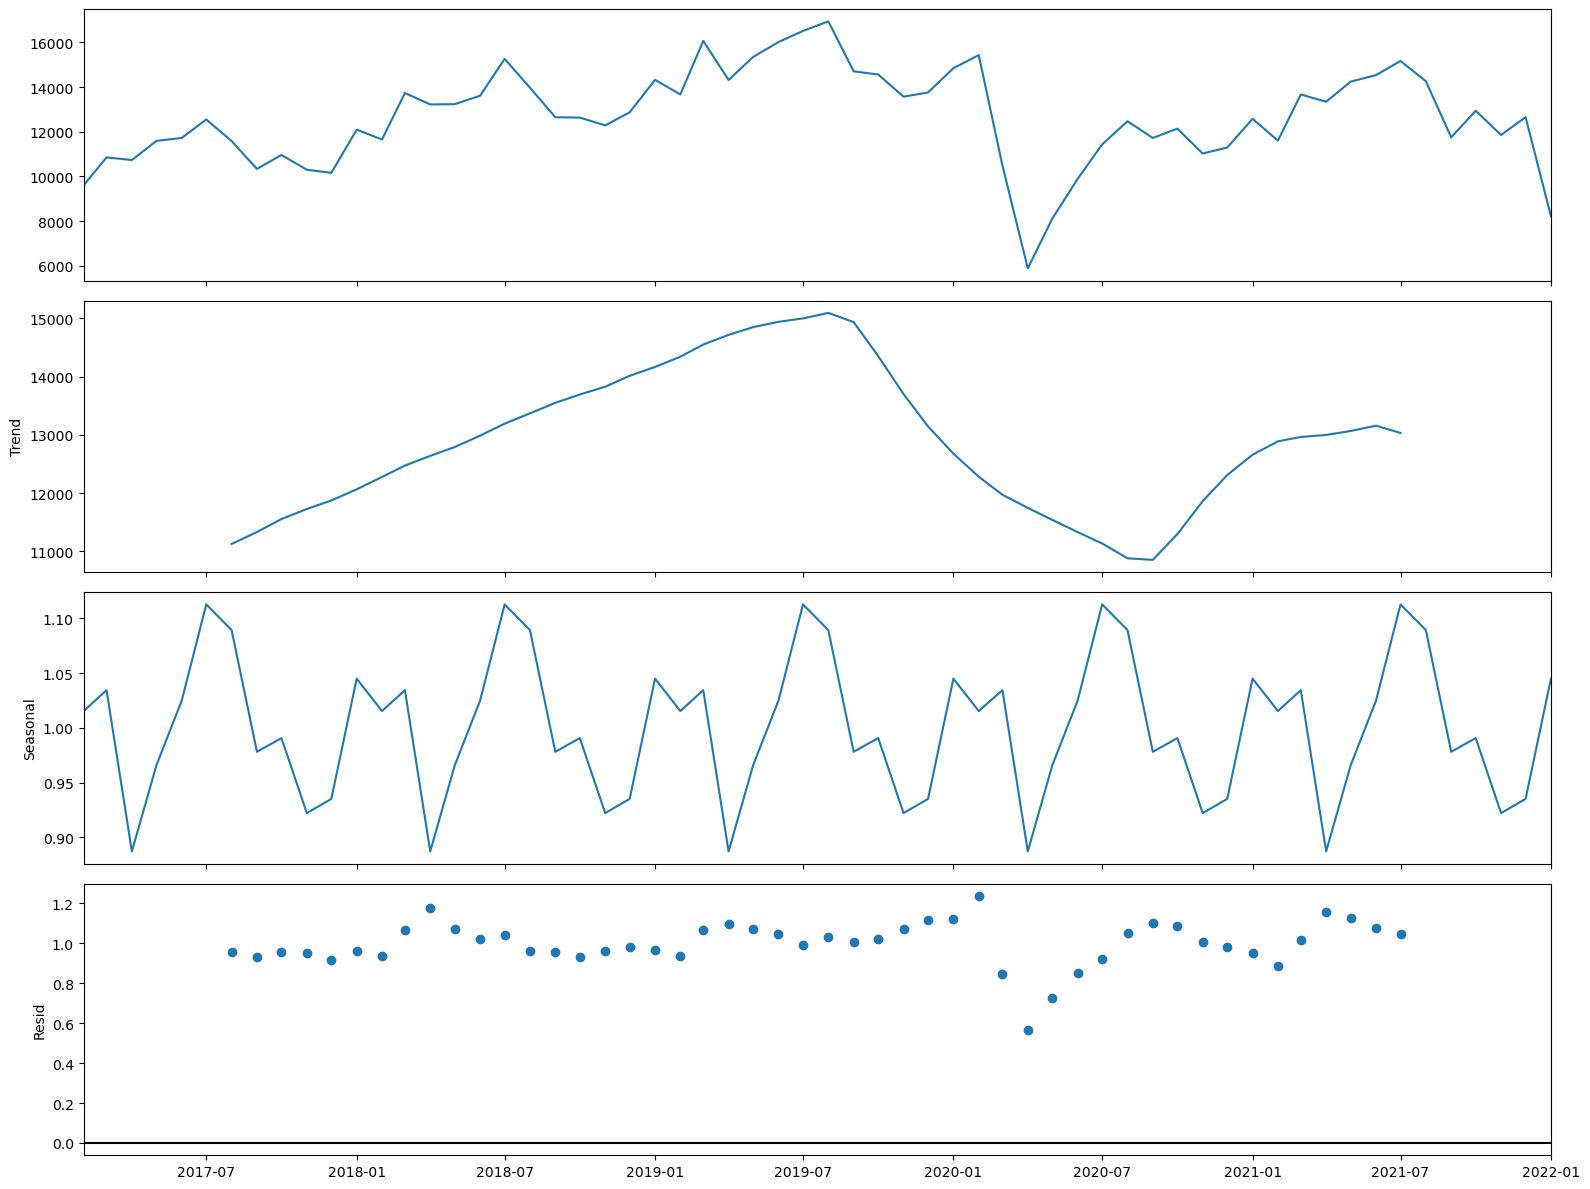

In [41]:
# Checking seasonal decomposition for review high rated

multiplicative_decomposition = seasonal_decompose(review_high_rated, model='multiplicative', period=12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

### **Sentiment Analysis**

#### How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

In [42]:
sentiment_df = pd.read_sql_query(f"""
WITH Sentiments AS (
    SELECT 
        business_id,
        SUM(useful) AS useful_count,
        SUM(funny) AS funny_count,
        SUM(cool) AS cool_count
    FROM 
        review
    GROUP BY 
        business_id
)
SELECT 
    b.business_id, 
    AVG(b.stars) AS avg_rating, 
    SUM(b.review_count) AS review_count, 
    s.useful_count, 
    s.funny_count, 
    s.cool_count
FROM 
    business AS b
JOIN 
    Sentiments AS s ON b.business_id = s.business_id
WHERE 
    b.business_id IN {tuple(business_id['business_id'])}
GROUP BY 
    b.business_id 
ORDER BY 
    review_count;
""", conn)

In [43]:
# Let's remove any outliers in the sentiment dataframe

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
29613,I2_0af3Gu4SyAq4Qdz5cFg,3.0,175,122,26,45
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29


In [44]:
#Let's calculate the success score for sentiment dataframe

sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

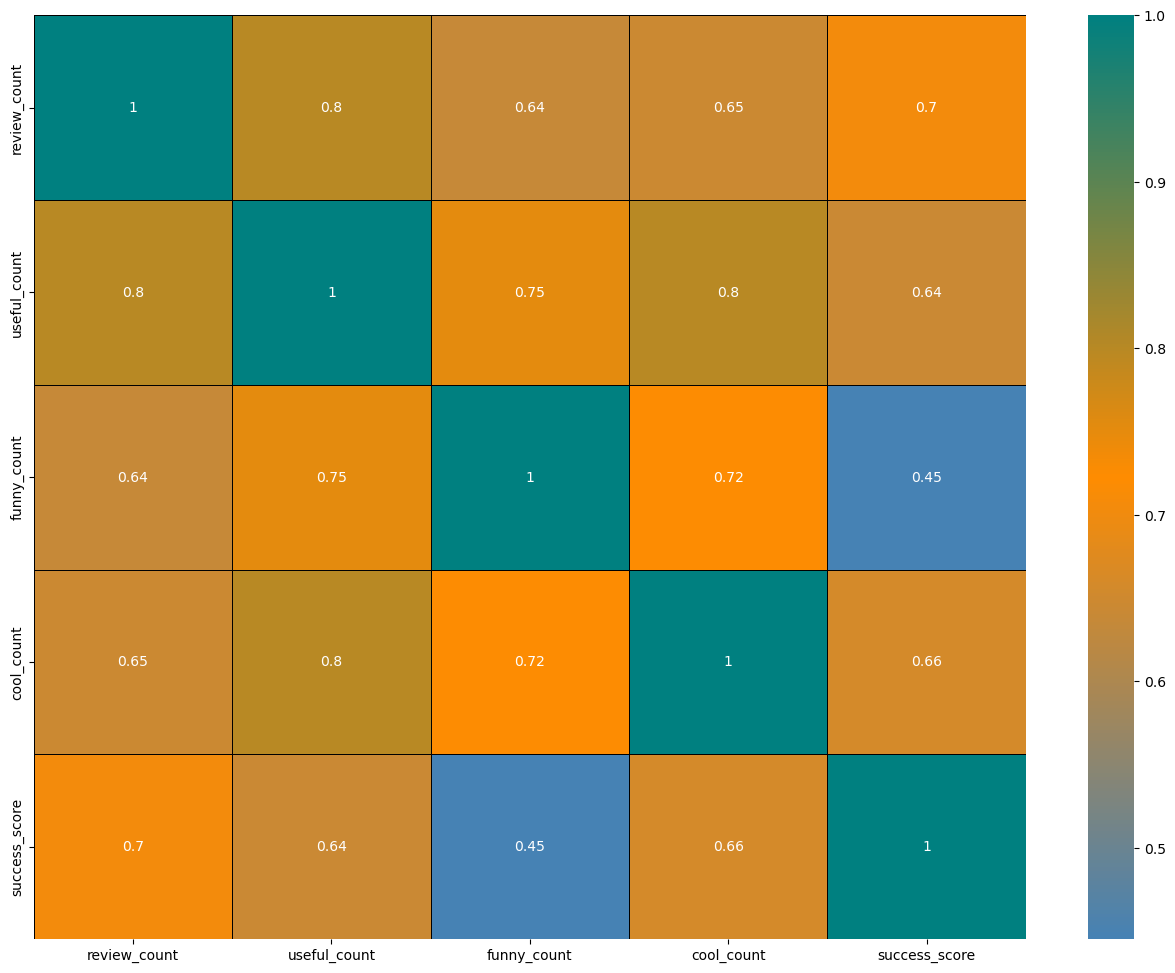

In [45]:
# Plot the correlation of the sentiments and success score 

sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap=custom_cmap, annot=True, linecolor='black', linewidths=0.5)
plt.show()

#### Let's check if there is any difference in engagement of elite users and non elite users?

In [54]:
elite_df = pd.read_sql_query(f"""SELECT elite,
                             COUNT(*) AS num_users,
                             SUM(review_count) AS total_review_count
                             FROM
                             (SELECT CASE
                             WHEN elite = '' THEN 'Not Elite'
                             ELSE 'Elite'
                             END AS elite,
                             u.review_count
                             FROM user u) AS elit_user
                             GROUP BY elite;
                             """, conn)

In [55]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


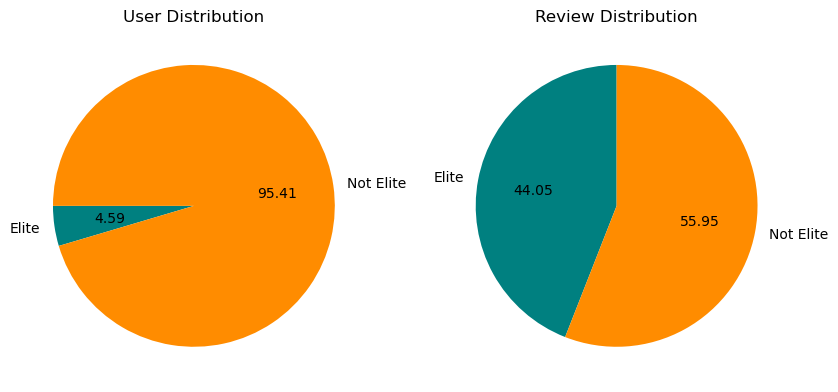

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(elite_df['num_users'], labels=elite_df['elite'], autopct='%.2f', startangle=180, colors=['#008080', '#FF8C00'])
plt.title('User Distribution')

plt.subplot(1,2,2)
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f', startangle=90, colors=['#008080', '#FF8C00'])
plt.title('Review Distribution')
plt.show()

#### Here we observe that elite users are more beneficial for the business growth as they have given the most number of reviews. Hence, a collaboration with elite users should be considered for business growth.

#### What are the peak hours for restaurants?

In [57]:
review_engagement = pd.read_sql_query(f"""SELECT CAST(strftime('%H', date) AS integer) AS hour,
                                      COUNT(*) as review_count
                                      FROM review
                                      GROUP BY hour;
""", conn)

tip_engagement = pd.read_sql_query(f""" SELECT CAST(strftime('%H', date) AS integer) AS hour,
                                   COUNT(*) AS tip_count
                                   FROM tip
                                   GROUP BY hour;
""", conn)

In [ ]:
# Calculate the peak hours for user engagement

checkin = pd.read_sql_query(f"""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()


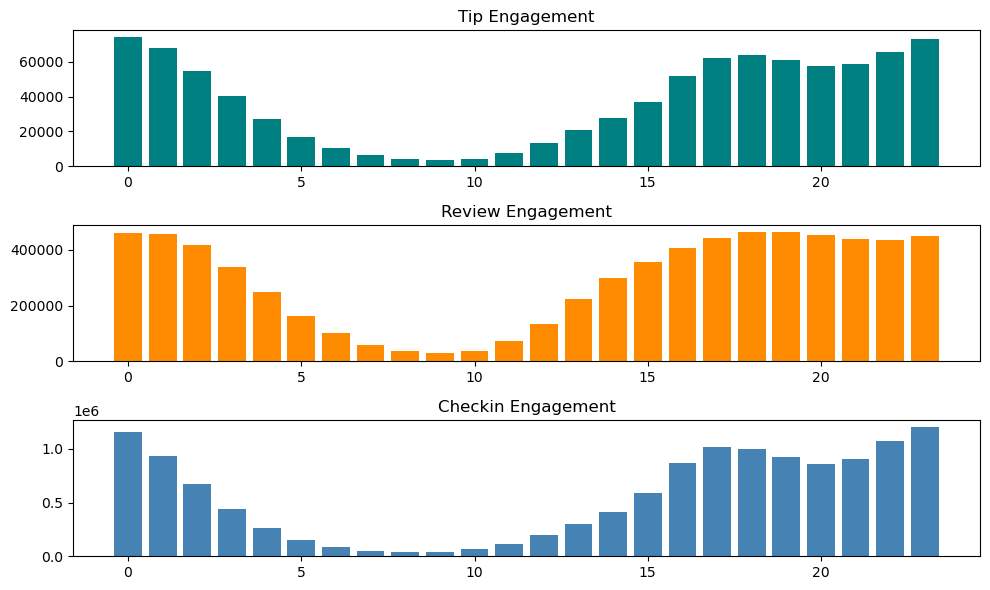

In [64]:
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#008080')
plt.title('Tip Engagement')

plt.subplot(3,1,2)
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#FF8C00')
plt.title('Review Engagement')

plt.subplot(3,1,3)
plt.bar(checkin_engagement.index, checkin_engagement[0], color='#4682B4')
plt.title('Checkin Engagement')
plt.tight_layout()
plt.show()

### **CONCLUSION:**
Here we observer that there is very less user engagement in the morning hours, and the peak hours usually start from 16:00 Onwards to 1:00. Post 1:00 the engagement drops